# Red Wine Quality Prediction

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [188]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [189]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [190]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# No Data is missing

# EDA

In [191]:
df.shape

(1599, 12)

# We have 1599 rows and 12 columns in dataset

In [192]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# We have float type value in all independent variables(there are 11 independent variables) and quality is our target variable(1 dependent variable).

In [193]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# No missing values in our dataset

In [194]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

# 

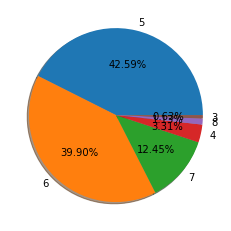

In [195]:
labels = '5', '6', '7', '4', '8', '3'

fig, ax = plt.subplots()
ax.pie(df['quality'].value_counts(),labels=labels, autopct='%1.2f%%', shadow=True)

plt.show()

# Out of 1599 rows, class 5 is 42.59% , 3 is 0.63%, 8 is 1.13% ,4 is 3.31%, 7 is 12.45%,6 is 39.90%

In [196]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

# from the above table we get the count,mean,std,min,max of our target variable.

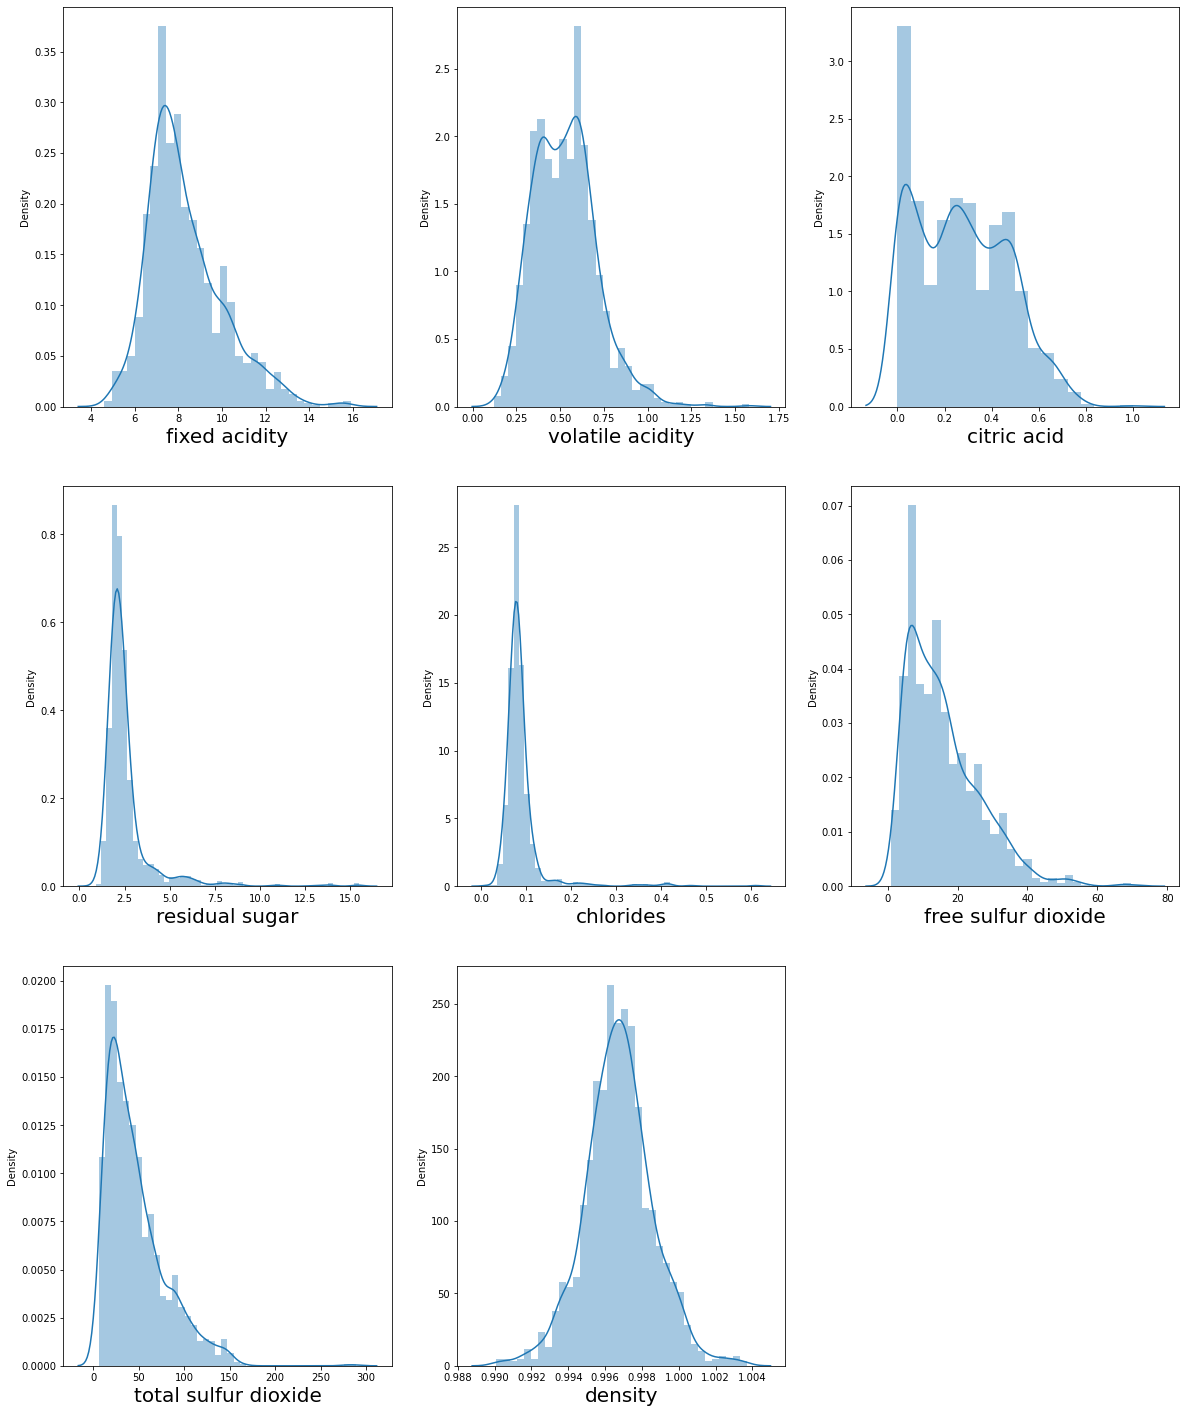

In [197]:
#Lets see how the data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1


for column in df:
    if plotnumber<=8: # asthere are 8 columns in the dataset.
        ax = plt.subplot(3,3, plotnumber)
        sn.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    
    plotnumber+=1
plt.show()

# Univariate analysis

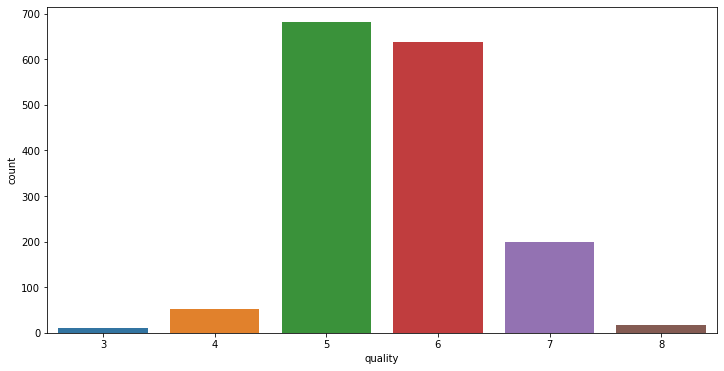

In [198]:
plt.figure(figsize=(12,6))
sn.countplot(df['quality'])
plt.show()

# here the classes are not equally distributed, there is a class imbalance issue.

# To check distribution plot

# Bi variate analysis,

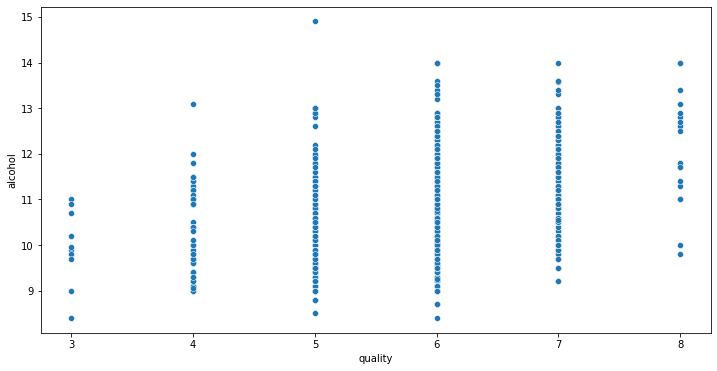

In [199]:
#comparison between quality and alcohol, scatter plot
plt.figure(figsize=(12,6))
sn.scatterplot(x ='quality', y ='alcohol', data = df, palette = "inferno")
plt.show()

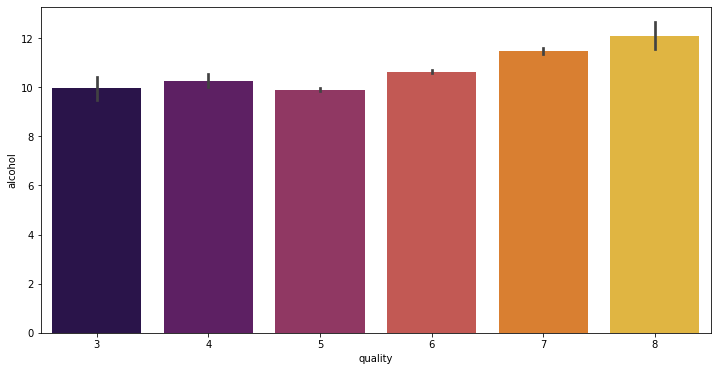

In [200]:
#comparison between quality and alcohol, bar plot
plt.figure(figsize=(12,6))
sn.barplot(x ='quality', y ='alcohol', data = df, palette = "inferno")
plt.show()

# As the quantity of alcohol is increasig the quality is also increasing, that is at the 8th quality the alcohol and the quality is highest.

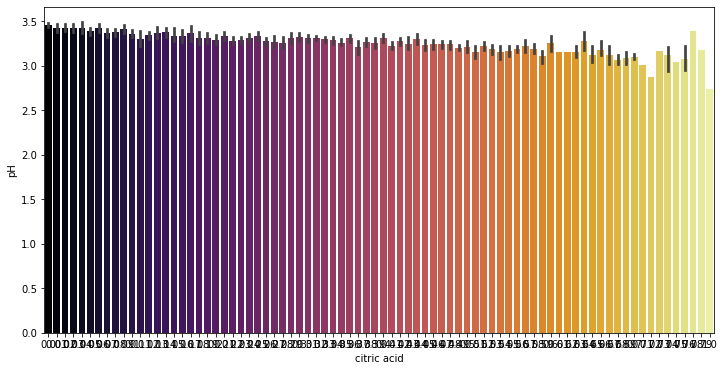

In [201]:
#comparison between citric acid and pH, bar plot
plt.figure(figsize=(12,6))
sn.barplot(x ='citric acid', y ='pH', data = df, palette = "inferno")
plt.show()

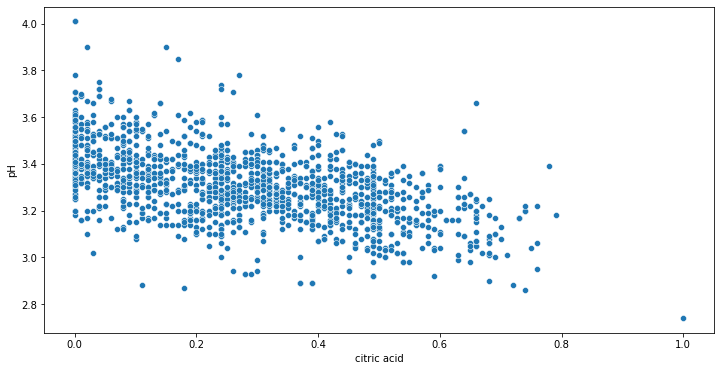

In [15]:
#comparison between citric acid and pH, scatter plot
plt.figure(figsize=(12,6))
sn.scatterplot(x ='citric acid', y ='pH', data = df, palette = "inferno")
plt.show()

# from the above plot, we can understand that as my pH is increasing the citric acid content is decreasing and also the pH is decreasing.
#that is as the pH decreases,the acidic nature increases and if the pH is high then it is basic in nature.

# Multi-variate analysis

<Figure size 864x432 with 0 Axes>

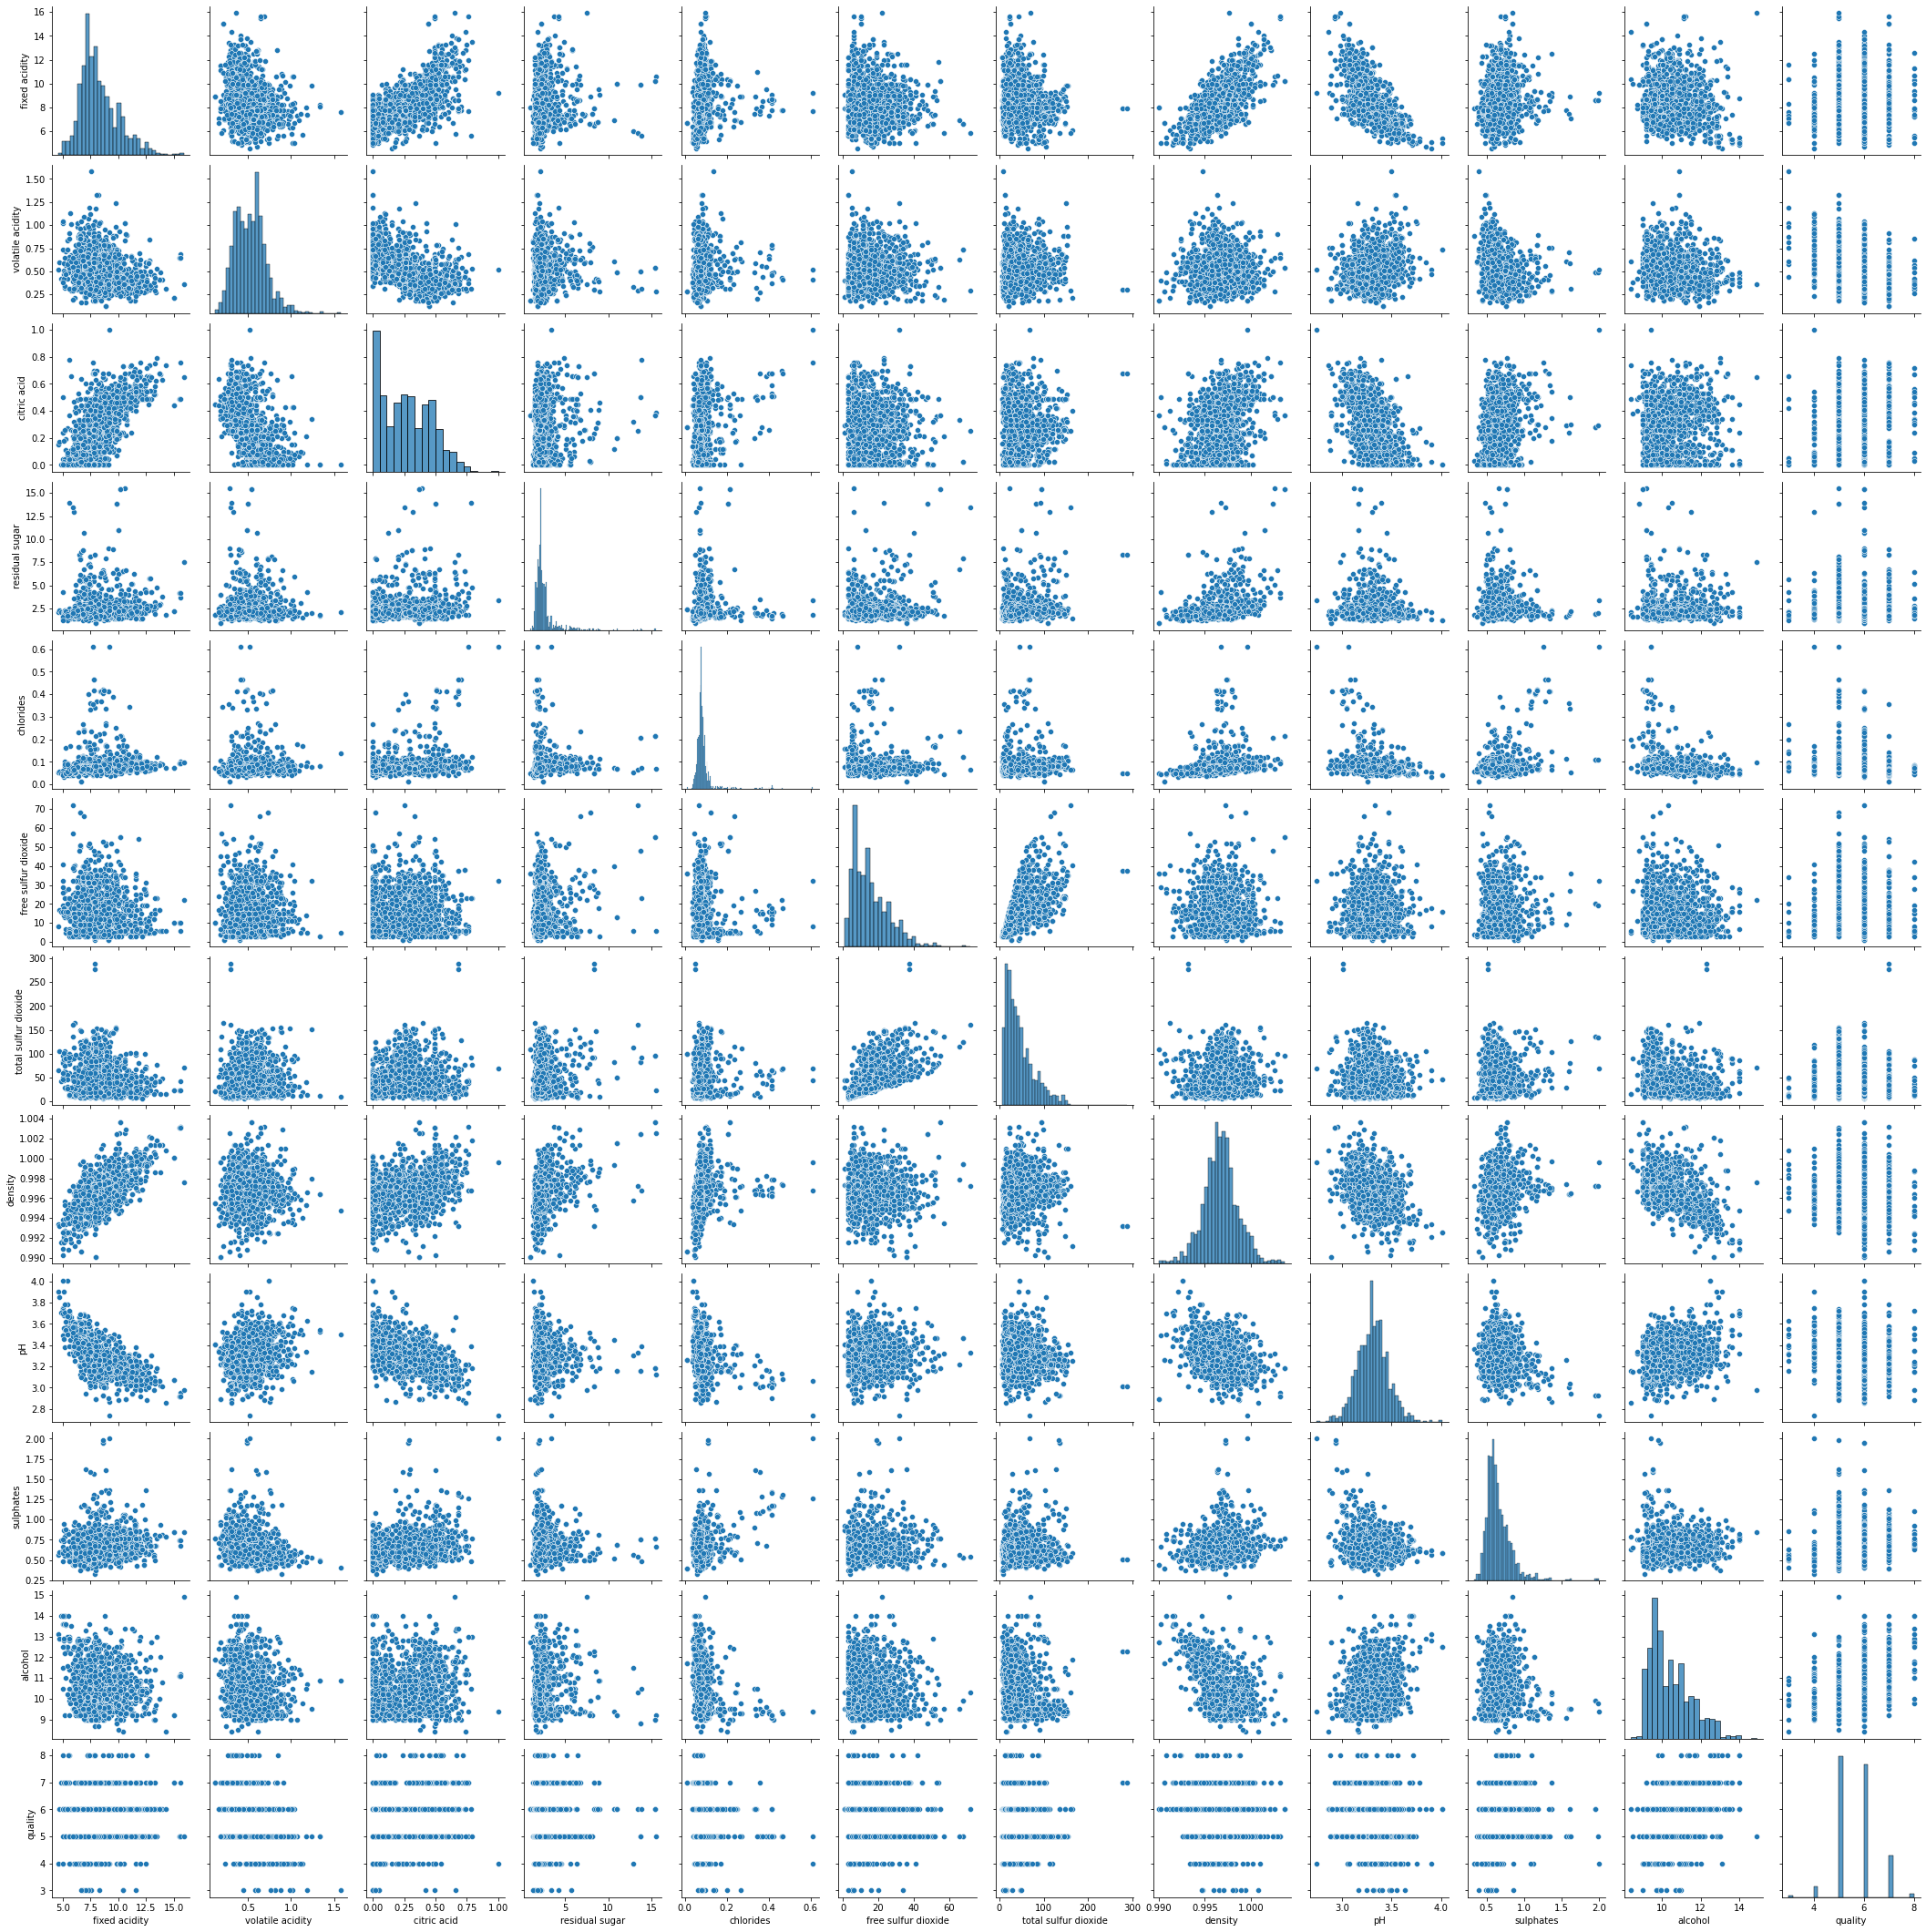

In [202]:
plt.figure(figsize=(12,6))
sn.pairplot(df)
plt.show()

# In the above code when we add Hue, it will increase the readiability of the code.

<Figure size 864x432 with 0 Axes>

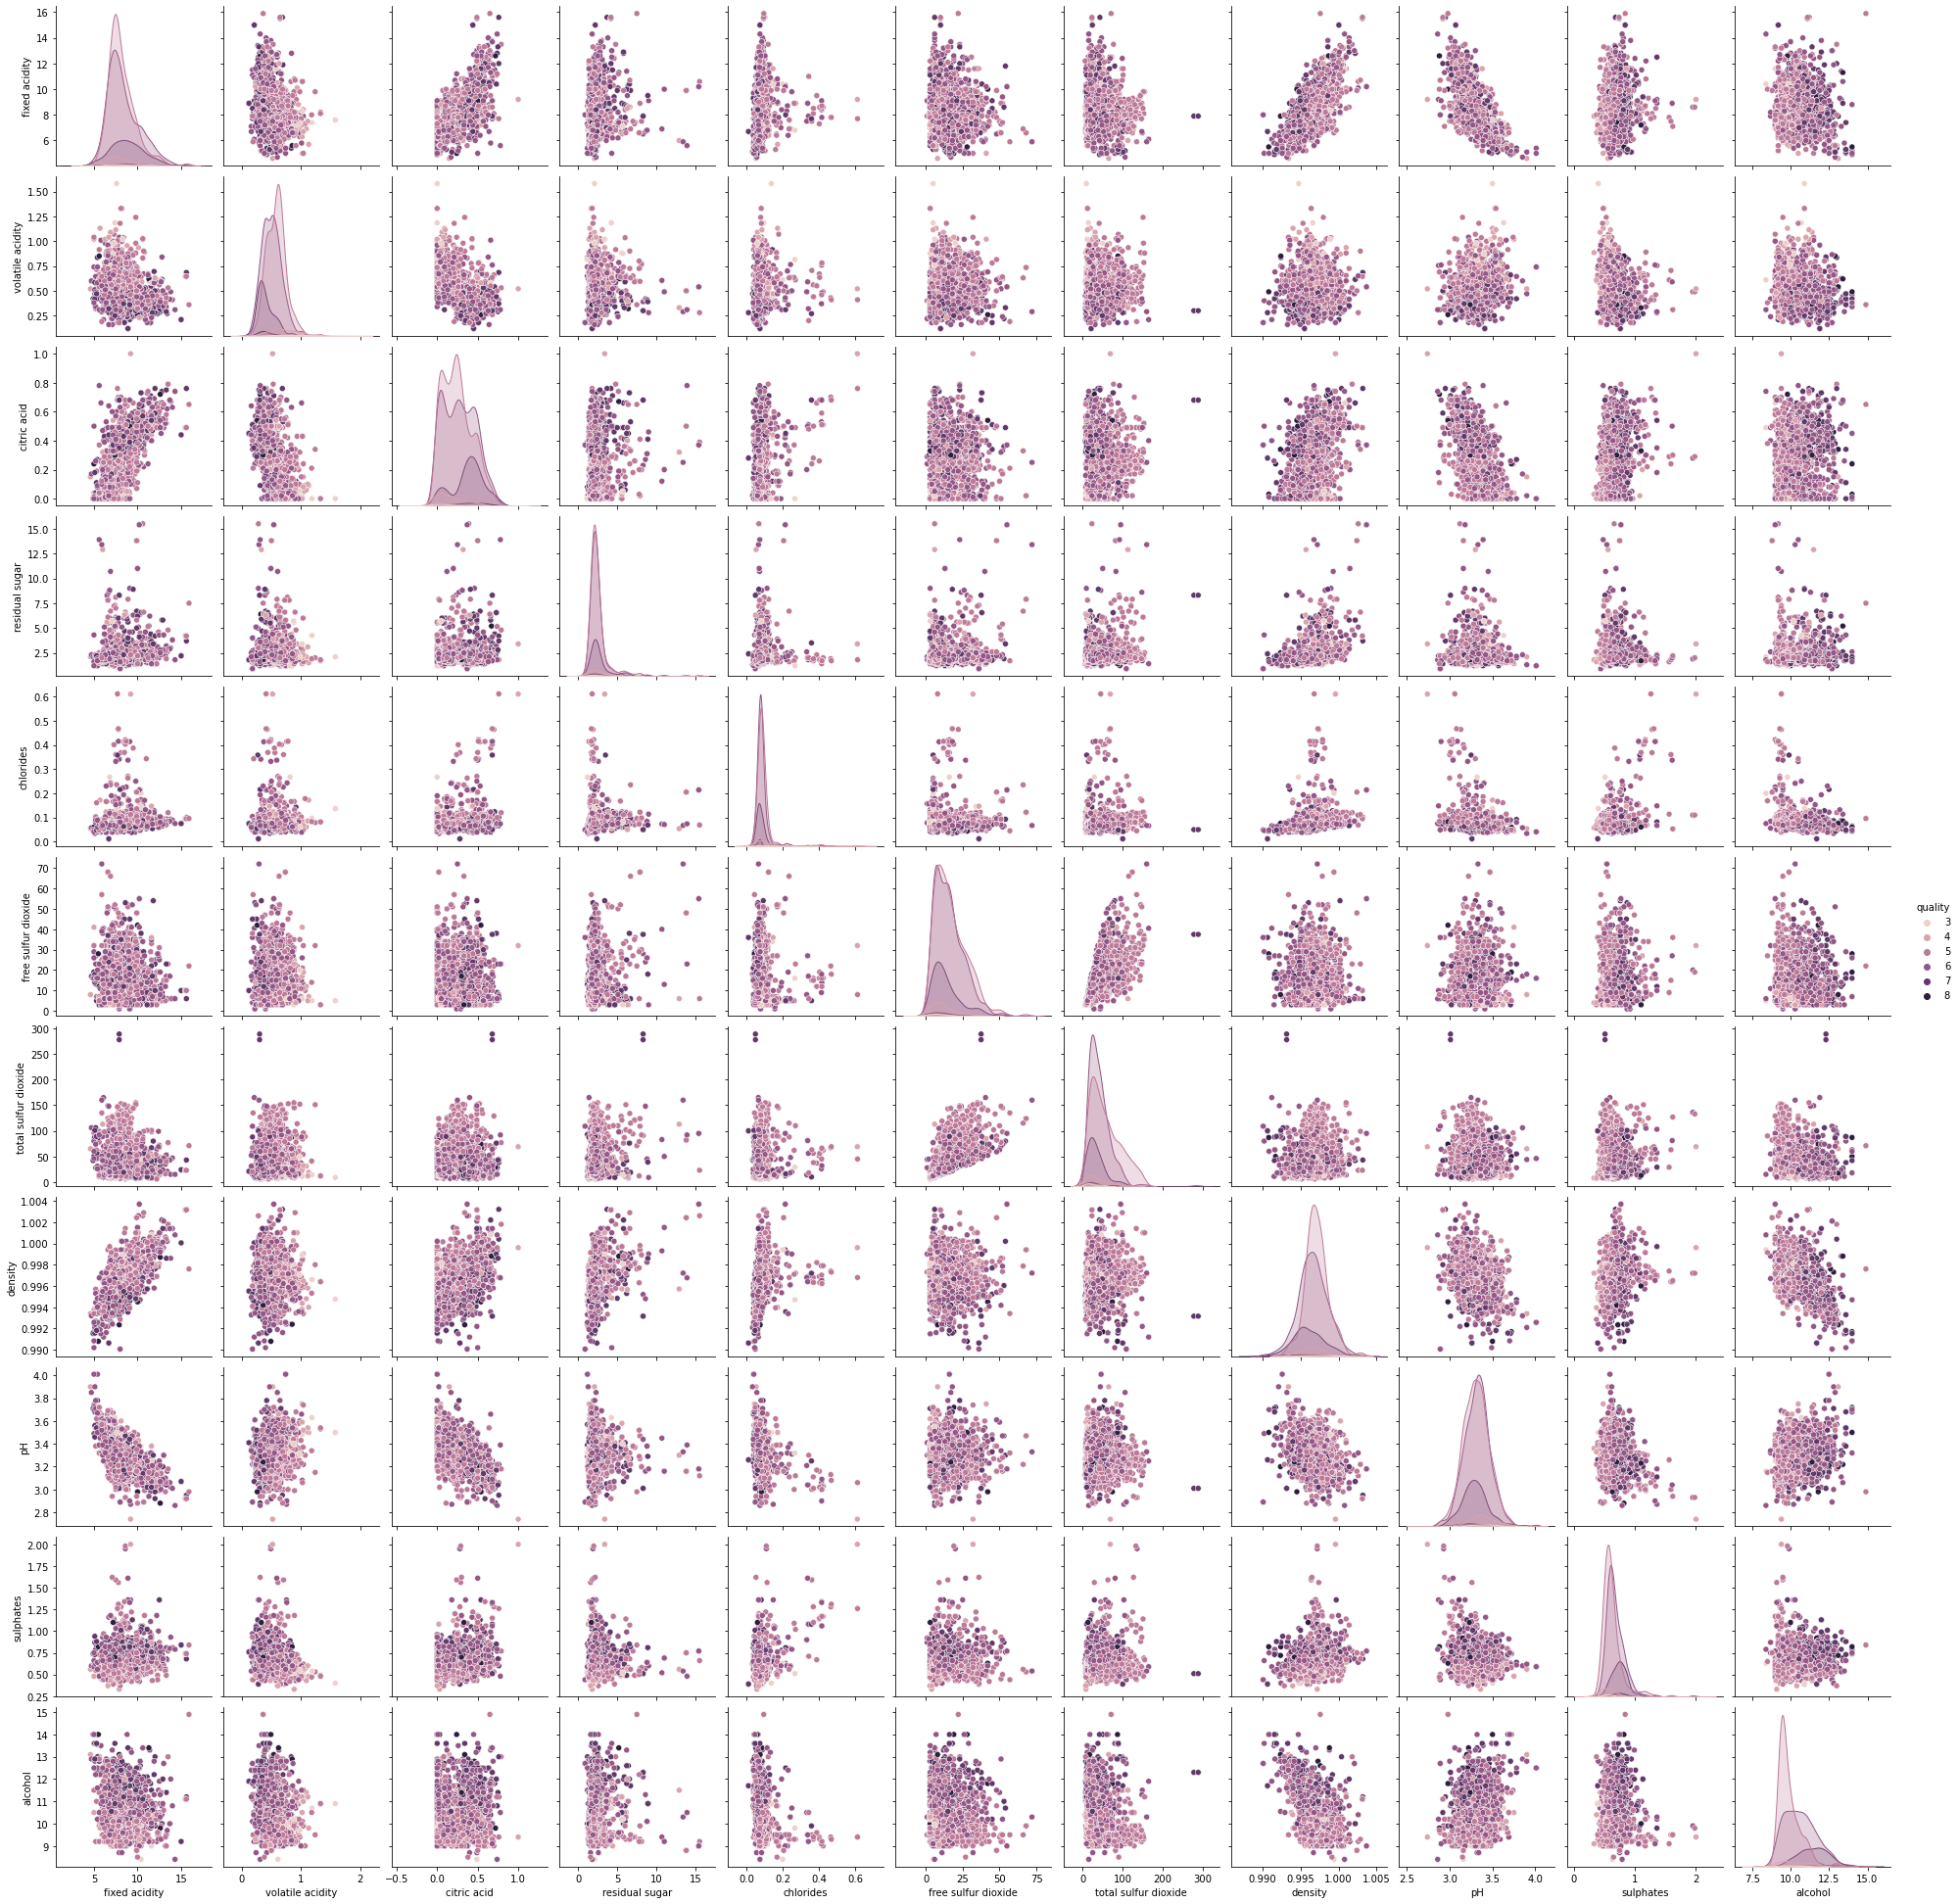

In [203]:
plt.figure(figsize=(12,6))
sn.pairplot(df,hue="quality")
plt.show()

# from the above plots, we check the relationship between quality(dependent variable) and other feature(independent variable).

# we are creating a heatmap, to find which other features are having a good relationship with our target variable that is quality.

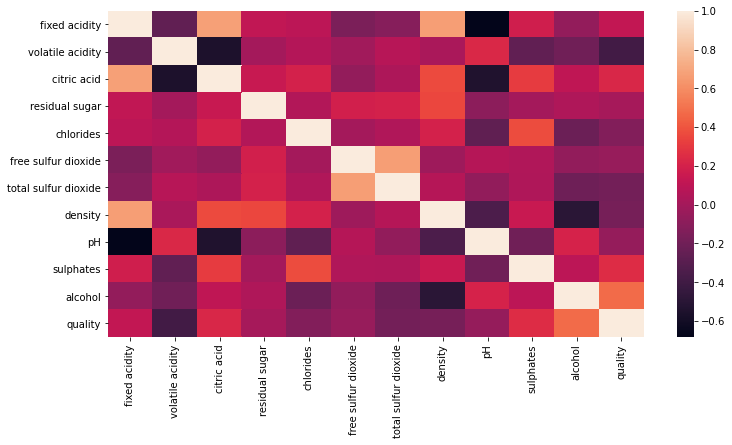

In [204]:
plt.figure(figsize=(12,6))
sn.heatmap(df.corr())
plt.show()

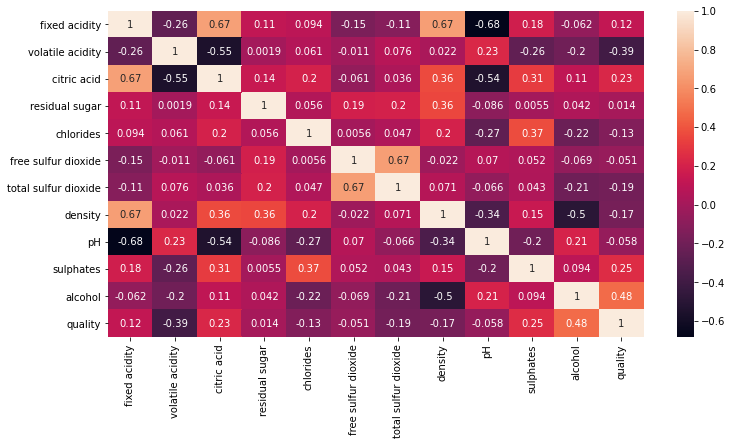

In [205]:
plt.figure(figsize=(12,6))
sn.heatmap(df.corr(), annot = True)
plt.show()

# we can see that the quantity is having a good relationship with alcohol(because as alcohol was increasing the quality was increasing),Also sulphates,density,chlorides,residual sugar,citric acid are having good realtionship with quality.

# Identifying outliers

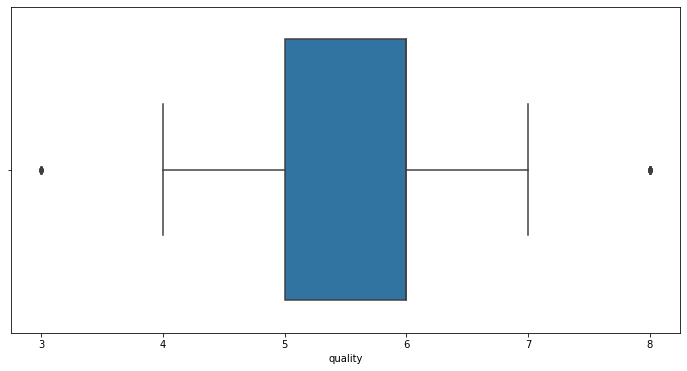

In [206]:
plt.figure(figsize=(12,6))
sn.boxplot(df["quality"])
plt.show()

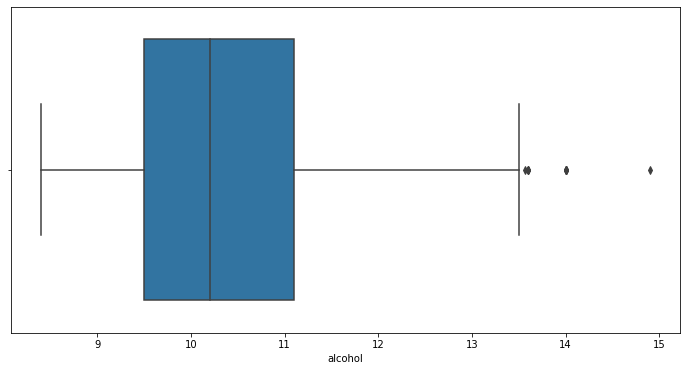

In [207]:
plt.figure(figsize=(12,6))
sn.boxplot(df["alcohol"])
plt.show()

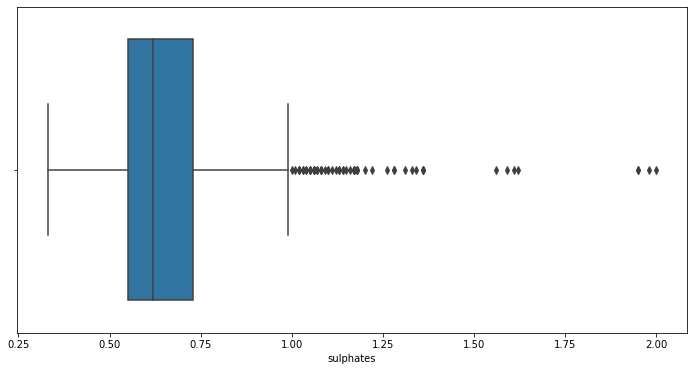

In [208]:
plt.figure(figsize=(12,6))
sn.boxplot(df["sulphates"])
plt.show()

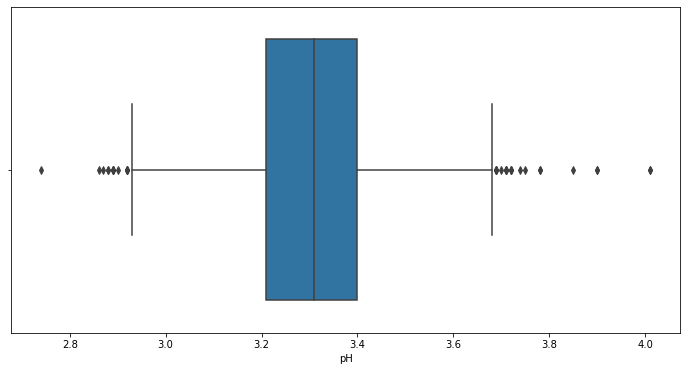

In [209]:
plt.figure(figsize=(12,6))
sn.boxplot(df["pH"])
plt.show()

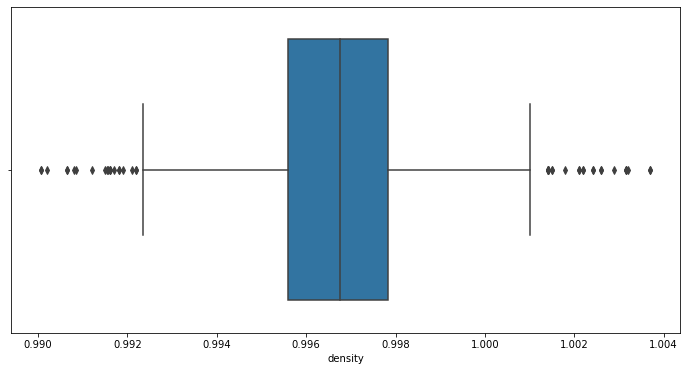

In [210]:
plt.figure(figsize=(12,6))
sn.boxplot(df["density"])
plt.show()

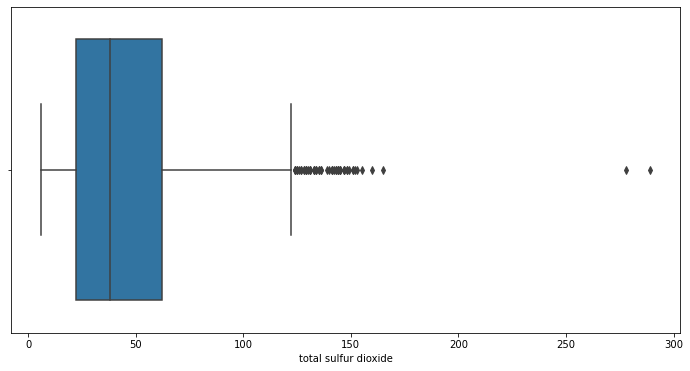

In [211]:
plt.figure(figsize=(12,6))
sn.boxplot(df["total sulfur dioxide"])
plt.show()

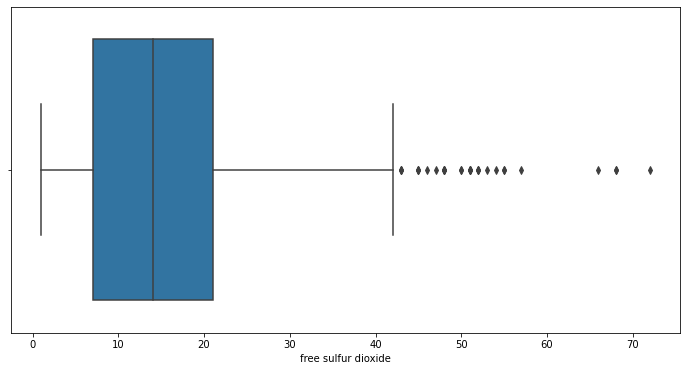

In [212]:
plt.figure(figsize=(12,6))
sn.boxplot(df["free sulfur dioxide"])
plt.show()

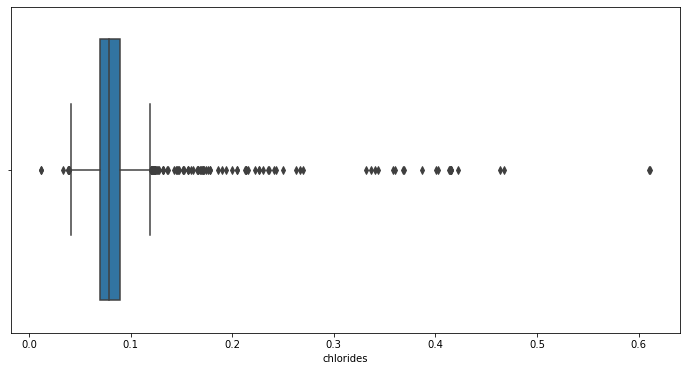

In [213]:
plt.figure(figsize=(12,6))
sn.boxplot(df["chlorides"])
plt.show()

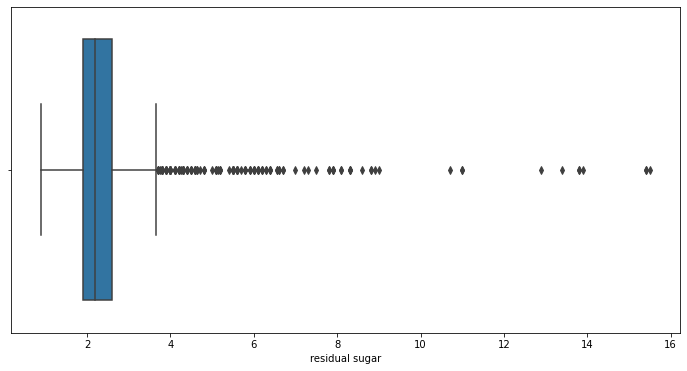

In [214]:
plt.figure(figsize=(12,6))
sn.boxplot(df["residual sugar"])
plt.show()

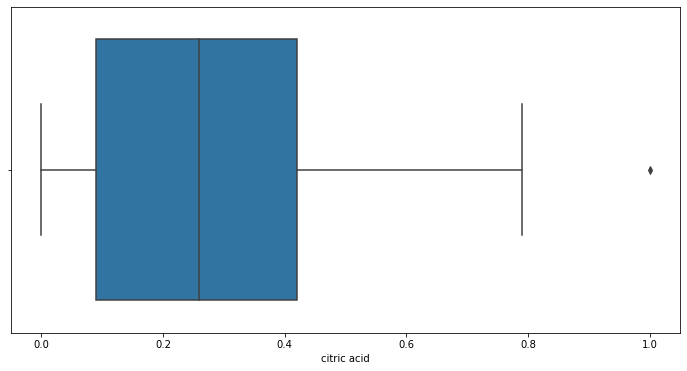

In [215]:
plt.figure(figsize=(12,6))
sn.boxplot(df["citric acid"])
plt.show()

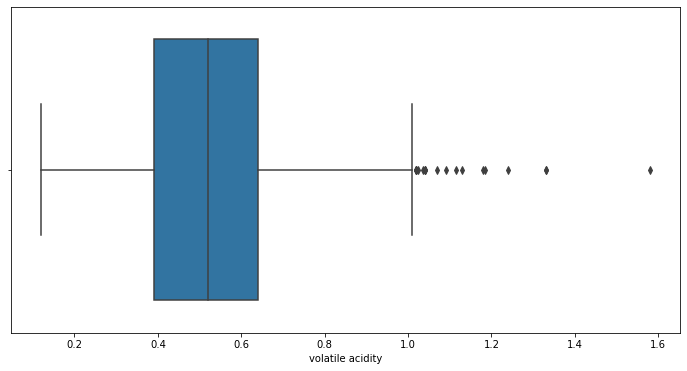

In [216]:
plt.figure(figsize=(12,6))
sn.boxplot(df["volatile acidity"])
plt.show()

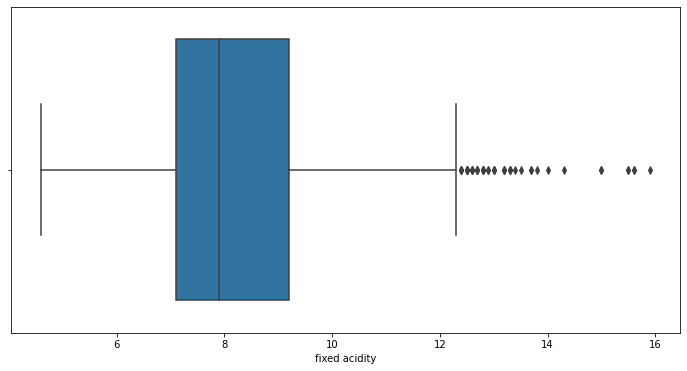

In [217]:
plt.figure(figsize=(12,6))
sn.boxplot(df["fixed acidity"])
plt.show()

# from the above boxplot, we can observe that we have outliers.

# To check Skewness

In [218]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [219]:
# fixed acidity	volatile acidity	citric acid	residual sugar	chlorides	free sulfur dioxide	total sulfur dioxide	density	pH	sulphates	alcohol	

# Outliers removal

In [220]:
from scipy.stats import zscore

z=np.abs(zscore(df))

new_df=df [(z<3).all(axis=1) ]

In [221]:
new_df.shape

(1451, 12)

# after removing outlier we lost 148 rows

In [222]:
df.shape

(1599, 12)

#before removing outliers we had (1599rows, 12columns) after removing we have 1451 rows and 12 columns

# to calculate percentage (148/1599) = 0.09255784

# the data loss is less than 10%, so it is completely fine.

In [223]:
x=new_df.drop("quality",axis=1)
y=new_df["quality"]

In [224]:
x.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol
7.2            0.360             0.46         2.1             0.074      24.0                 44.0                  0.99534  3.40  0.85       11.0       4
               0.695             0.13         2.0             0.076      12.0                 20.0                  0.99546  3.29  0.54       10.1       4
6.7            0.460             0.24         1.7             0.077      18.0                 34.0                  0.99480  3.39  0.60       10.6       4
7.5            0.510             0.02         1.7             0.084      13.0                 31.0                  0.99538  3.36  0.54       10.5       4
6.4            0.640             0.21         1.8             0.081      14.0                 31.0                  0.99689  3.59  0.66       9.8        3
                                                                           

In [225]:
y.value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

# Data Preprocessing

# oversampling

In [226]:
#since our class was imbalanced, we are doing over sampling method.
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_res,y_res=SM.fit_resample(x, y)

In [227]:
y.value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

In [228]:
from sklearn.preprocessing import StandardScaler

stdscale = StandardScaler().fit(x_train)
x_train_std = stdscale.transform(x_train)
x_train_std = stdscale.transform(x_test)

# we are now scaling the values down

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [230]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30,random_state =0)

# here we are using the accuracy score to find the best model, as the classes are balanced.

# Finding the best random state

In [231]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Decison Tree model

In [235]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
acc=classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           4       0.15      0.12      0.14        16
           5       0.68      0.72      0.70       173
           6       0.64      0.61      0.62       184
           7       0.48      0.51      0.49        57
           8       0.20      0.17      0.18         6

    accuracy                           0.61       436
   macro avg       0.43      0.43      0.43       436
weighted avg       0.61      0.61      0.61       436



# DTC accuracy is 61%

In [236]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
acc=classification_report(y_test, pred)
print(acc)


              precision    recall  f1-score   support

           4       0.00      0.00      0.00        16
           5       0.70      0.82      0.75       173
           6       0.68      0.68      0.68       184
           7       0.63      0.56      0.59        57
           8       1.00      0.17      0.29         6

    accuracy                           0.69       436
   macro avg       0.60      0.44      0.46       436
weighted avg       0.66      0.69      0.67       436



# RFC accuracy is 69%

In [237]:
SV = SVC()
SV.fit(x_train, y_train)
pred = SV.predict(x_test)
acc=classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        16
           5       0.61      0.49      0.54       173
           6       0.48      0.78      0.60       184
           7       0.00      0.00      0.00        57
           8       0.00      0.00      0.00         6

    accuracy                           0.52       436
   macro avg       0.22      0.25      0.23       436
weighted avg       0.45      0.52      0.47       436



# SVC accuracy is 52%

In [ ]:
#So here RFC is giving the best result/ highest accuracy
#But we are not sure that this is the best model as it can be due to overfitting.

In [238]:
#So now we are doing the cross validation

from sklearn.model_selection import cross_val_score

In [240]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.4665671288067307


# DTC = 46.7% ie.,47%

In [242]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.5810001184974523


# RFC = 58.65   ie., 59%

In [243]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.49961843820357854


# SVC = 49.9    ie.,50%

In [ ]:
#Cross validation for RFC is giving the best result/ highest accuracy

# Decision tree score

DTC - 61 - 47 = 14
RFC - 68 - 59 = 10
SVC - 52 - 50 = 2 

# hence the SVC is the best model

In [170]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [260]:
y_test = SV.predict(x_test)

In [261]:
y_pred = SV.predict(x_test)

In [254]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.5229357798165137

# Cofusion matrix

In [257]:

conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[  0,   5,  11,   0,   0],
       [  0,  84,  89,   0,   0],
       [  0,  40, 144,   0,   0],
       [  0,   7,  50,   0,   0],
       [  0,   2,   4,   0,   0]], dtype=int64)

In [ ]:
# y_test is actual data
# y_pred is predicted data

In [259]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [263]:
Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)
Accuracy 

0.9438202247191011

In [271]:
# Precison
Precison = true_positive/(true_positive+false_positive)
Precison

0.0

In [272]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

nan

In [274]:
# F1_Score
F1_Score = 2*(Recall * Precison) / (Recall + Precison)
F1_Score

nan

In [275]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

1.0

In [328]:
#fpr = 'False Positive Rate'
#tpr = 'True Positive Rate'
#thresholds ='thresholds'

In [329]:
# ROC
fpr,tpr, thresholds = roc_curve(y_test,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [300, 436]

In [330]:
fpr

{}

In [331]:
tpr

{}

In [332]:
thresholds

NameError: name 'thresholds' is not defined

TypeError: float() argument must be a string or a number, not 'dict'

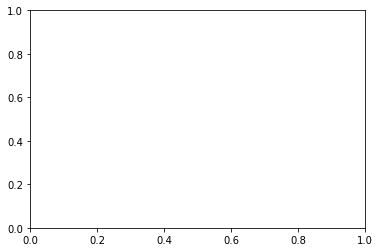

In [333]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--',label='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charactersitics (ROC) Curve')
plt.legend()
plt.show()

# Hyperparameter tuning

In [158]:
from sklearn.model_selection import GridSearchCV

In [159]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [160]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [161]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.514 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.521 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.521 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.521 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.521 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.679 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.657 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.693 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.893 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [130]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [131]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


SVC(C=1000, gamma=0.001)


In [136]:
grid_predictions = grid.predict(x_test)

In [137]:
# print classification report
print(classification_report(y_test, grid_predictions))


              precision    recall  f1-score   support

           4       0.00      0.00      0.00        16
           5       0.60      0.74      0.66       173
           6       0.59      0.58      0.59       184
           7       0.57      0.40      0.47        57
           8       0.00      0.00      0.00         6

    accuracy                           0.59       436
   macro avg       0.35      0.34      0.34       436
weighted avg       0.56      0.59      0.57       436



In [ ]:
Final_mod = SVC('C' [0.1, 1, 10, 100, 1000],'gamma' [1, 0.1, 0.01, 0.001, 0.0001],'kernel' ['rbf'])
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

# This is our best Model

# Saving the model

In [ ]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

# Loading the model

In [ ]:
mod=joblib.load("FinalModel.pkl")

In [ ]:
print(mod.predict(x_test))